In [ ]:
pip install numpy pandas matplotlib scikit-learn tensorflow


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


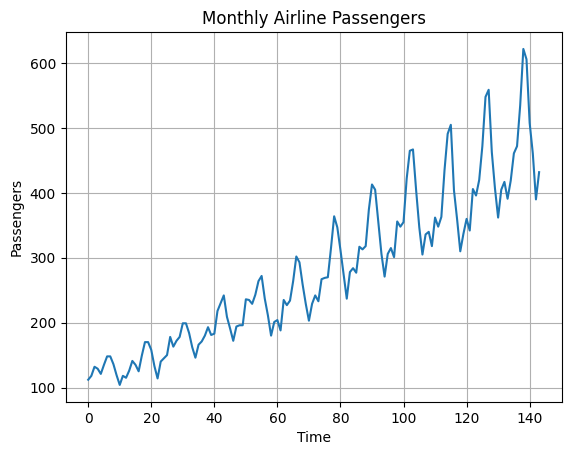

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
df.columns = ['Month', 'Passengers']

plt.plot(df['Passengers'])
plt.title('Monthly Airline Passengers')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.grid()
plt.show()


In [ ]:
# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(df['Passengers'].values.reshape(-1, 1))

# Create time steps
def create_dataset(dataset, time_step=10):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y, epochs=500, batch_size=16, verbose=1)


Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0112
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0085
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0089
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0093
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0095
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0072
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0086
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0084
Epoch 10/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0067
Epoch 11/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0067
Epoch 12/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0081
Epoch 13/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064
Epoch 14/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055
Epoch 15/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054
Epoch 16/500
9/9 ━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


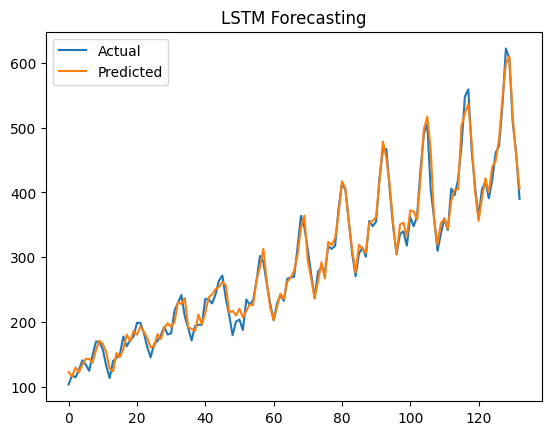

In [ ]:
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y.reshape(-1, 1))

plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title("LSTM Forecasting")
plt.show()


In [ ]:
# Calculate and print metrics
mae = mean_absolute_error(actual, predictions)
rmse = np.sqrt(mean_squared_error(actual, predictions))
r2 = r2_score(actual, predictions)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 10.72
RMSE: 13.62
R² Score: 0.99
